In [1]:
from PIL import Image
import numpy as np
from skimage import color
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio
from scipy import ndimage
import skimage.measure


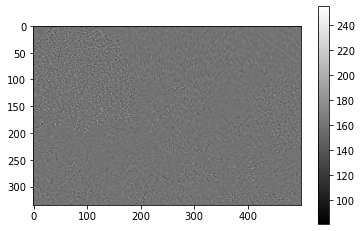

In [2]:
cyg = Image.open("cyg.png")
cyg = np.array(cyg).mean(axis=2)

diff = Image.open("diff.png")
diff = np.array(diff).mean(axis=2)

alex = Image.open("alex.png")
alex = np.array(alex).mean(axis=2)


diffalex = Image.open("diffalex.png")
diffalex = np.array(diffalex).mean(axis=2)

# imglab = color.rgb2lab(diff).astype("float32")
# diff = np.array([imglab[:, :, 0]])
# dev = np.array(diff)/np.array(cyg)
plt.imshow(diffalex, cmap='gray')
plt.colorbar()
# plt.colorbar()

In [3]:
def sliding_mean(arr, k=8):
    n,m = arr.shape
    std = np.zeros((n-k,m-k))
    mean = np.zeros((n-k,m-k))
    Lstd = []
    Lmean = []
    for i in range(0,n-k):
        for j in range(0,m-k):
            mm = np.mean(arr[i:i+k,j:j+k])
            ss = np.std(arr[i:i+k,j:j+k])
            std[i,j]=ss
            mean[i,j]=mm
            Lstd.append(ss)
            Lmean.append(mm)
    return std,mean, Lstd,Lmean
std,mean,Lstd,Lmean = sliding_mean(diff)
std2,mean2,Lstd2,Lmean2 = sliding_mean(cyg)

(430, 576)
(430, 576)


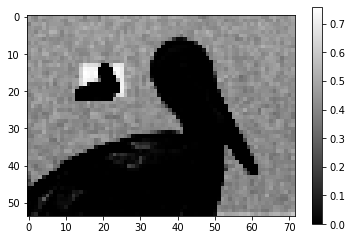

In [4]:
filter=8
std_r=skimage.measure.block_reduce(std, (filter,filter), np.mean)
mean_r=skimage.measure.block_reduce(mean2, (filter,filter), np.mean)
std2_r =skimage.measure.block_reduce(std2, (filter,filter), np.mean)

print(std.shape)
print(std2.shape)

plt.imshow(np.exp(-std2_r), cmap='gray')
plt.colorbar()

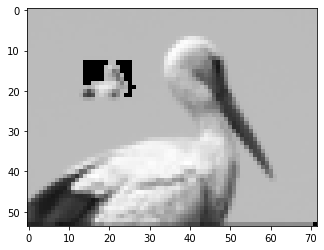

In [5]:
dx,dy = std_r.shape

Lx=[]
Ly=[]
copy = mean_r.copy()
for i in range(dx):
    for j in range(dy):
        if np.exp(-std2_r[i,j])>0.4:
            if std_r[i,j]<0.6:
                copy[i,j]=0

            Lx.append(mean_r[i,j])
            Ly.append(std_r[i,j])
# plt.plot(Lx,Ly,'o')

plt.imshow(copy, cmap='gray')
# plt.imshow(np.exp(-std2_r)/mean_r)

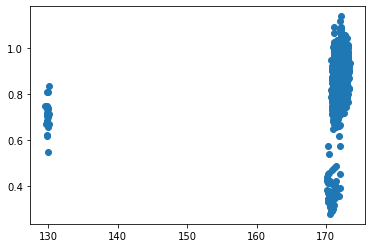

In [6]:
plt.plot(Lx,Ly,'o')

